# Time Series

In [108]:
import pandas as pd
import numpy as np
from scipy.fft import fft, ifft, fftfreq
import plotly.express as px

In [109]:
df = pd.read_csv("../daily-total-female-births.csv")
df.head(10)

,Date,Births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44
5,1959-01-06,29
6,1959-01-07,45
7,1959-01-08,43
8,1959-01-09,38
9,1959-01-10,27


In [110]:
df.shape

(365, 2)

<Axes: xlabel='Date'>

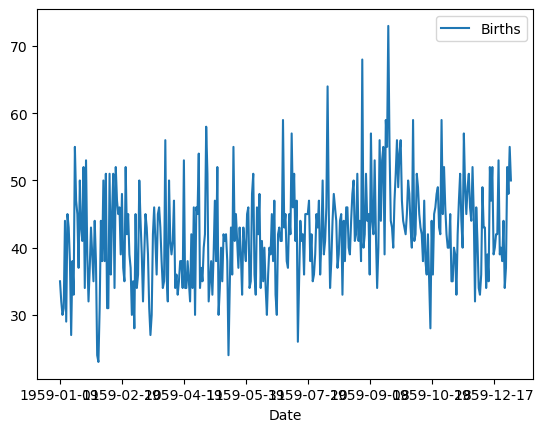

In [111]:
df.plot.line(x="Date", y="Births")

## Moving Average (Rolling)

In [112]:
windows = [3, 5, 10, 15]
for window in windows:
    df[f"Births W{window}"] = df["Births"].rolling(window=window).mean()

df.head(20)

,Date,Births,Births W3,Births W5,Births W10,Births W15
0,1959-01-01,35,NaN,NaN,NaN,NaN
1,1959-01-02,32,NaN,NaN,NaN,NaN
2,1959-01-03,30,32.333333,NaN,NaN,NaN
3,1959-01-04,31,31.000000,NaN,NaN,NaN
4,1959-01-05,44,35.000000,34.4,NaN,NaN
5,1959-01-06,29,34.666667,33.2,NaN,NaN
6,1959-01-07,45,39.333333,35.8,NaN,NaN
7,1959-01-08,43,39.000000,38.4,NaN,NaN
8,1959-01-09,38,42.000000,39.8,NaN,NaN
9,1959-01-10,27,36.000000,36.4,35.4,NaN


<Axes: xlabel='Date'>

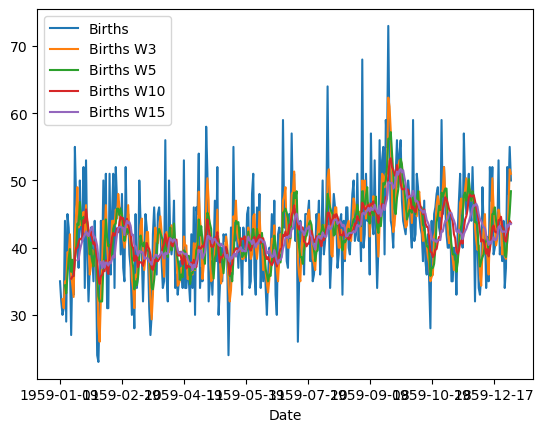

In [113]:
df.plot.line(x="Date", y=["Births",
                          "Births W3", "Births W5",
                          "Births W10", "Births W15"])

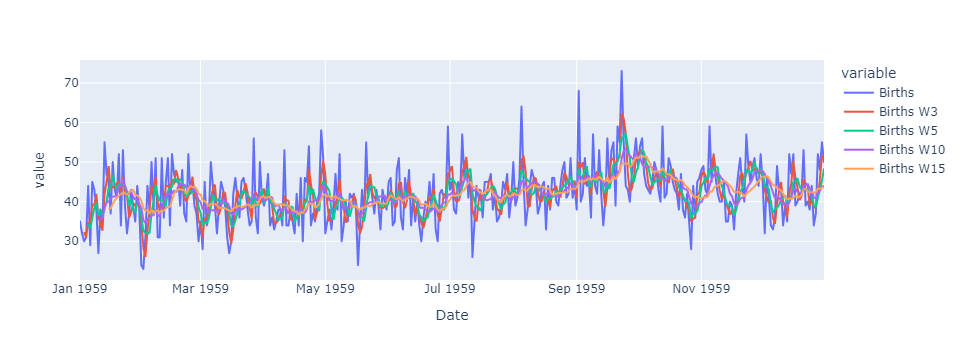

In [114]:
fig = px.line(df, x="Date",
              y = ["Births",
                          "Births W3", "Births W5",
                          "Births W10", "Births W15"])
fig.show()

## Lagging

In [115]:
# lagging
df["Day -1"] = df["Births"].shift(1)
df["Day -2"] = df["Births"].shift(2)

# lagging with difference
df["Day Diff -1"] = df["Day -1"].diff(1)

# lagging with ratio 
df["Day Diff Per -1"] = df["Day Diff -1"] / df["Day -1"]
df.head(10)

,Date,Births,Births W3,Births W5,Births W10,Births W15,Day -1,Day -2,Day Diff -1,Day Diff Per -1
0,1959-01-01,35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1959-01-02,32,NaN,NaN,NaN,NaN,35.0,NaN,NaN,NaN
2,1959-01-03,30,32.333333,NaN,NaN,NaN,32.0,35.0,-3.0,-0.093750
3,1959-01-04,31,31.000000,NaN,NaN,NaN,30.0,32.0,-2.0,-0.066667
4,1959-01-05,44,35.000000,34.4,NaN,NaN,31.0,30.0,1.0,0.032258
5,1959-01-06,29,34.666667,33.2,NaN,NaN,44.0,31.0,13.0,0.295455
6,1959-01-07,45,39.333333,35.8,NaN,NaN,29.0,44.0,-15.0,-0.517241
7,1959-01-08,43,39.000000,38.4,NaN,NaN,45.0,29.0,16.0,0.355556
8,1959-01-09,38,42.000000,39.8,NaN,NaN,43.0,45.0,-2.0,-0.046512
9,1959-01-10,27,36.000000,36.4,35.4,NaN,38.0,43.0,-5.0,-0.131579


## Drop NA

In [116]:
df.dropna(inplace=True)
df.shape

(351, 10)

## Fourier Transformation

In [117]:
# fast fourier transformation
df["Births FFT"] = fft(df["Births"].values)
df["Births W15 FFT"] = fft(df["Births W15"].values)

df.head(5)

,Date,Births,Births W3,Births W5,Births W10,Births W15,Day -1,Day -2,Day Diff -1,Day Diff Per -1,Births FFT,Births W15 FFT
14,1959-01-15,45,49.000000,43.6,40.0,38.133333,47.0,55.0,-8.0,-0.170213,14796.000000- 0.000000j,14756.733333- 0.000000j
15,1959-01-16,37,43.000000,43.4,40.8,38.266667,45.0,47.0,-2.0,-0.044444,-33.832868+ 577.064330j,-0.639284+ 578.034339j
16,1959-01-17,50,44.000000,46.8,41.3,39.466667,37.0,45.0,-8.0,-0.216216,-113.885512- 66.495569j,-163.818712- 29.821077j
17,1959-01-18,43,43.333333,44.4,41.3,40.333333,50.0,37.0,13.0,0.260000,125.590958- 77.497166j,48.424746- 106.292255j
18,1959-01-19,41,44.666667,43.2,41.6,41.000000,43.0,50.0,-7.0,-0.162791,101.165157+ 117.294171j,101.917254+ 63.101989j


In [118]:
df["Date Freq"] = fftfreq(n=df.shape[0], d=1)
df.head(5)

,Date,Births,Births W3,Births W5,Births W10,Births W15,Day -1,Day -2,Day Diff -1,Day Diff Per -1,Births FFT,Births W15 FFT,Date Freq
14,1959-01-15,45,49.000000,43.6,40.0,38.133333,47.0,55.0,-8.0,-0.170213,14796.000000- 0.000000j,14756.733333- 0.000000j,0.000000
15,1959-01-16,37,43.000000,43.4,40.8,38.266667,45.0,47.0,-2.0,-0.044444,-33.832868+ 577.064330j,-0.639284+ 578.034339j,0.002849
16,1959-01-17,50,44.000000,46.8,41.3,39.466667,37.0,45.0,-8.0,-0.216216,-113.885512- 66.495569j,-163.818712- 29.821077j,0.005698
17,1959-01-18,43,43.333333,44.4,41.3,40.333333,50.0,37.0,13.0,0.260000,125.590958- 77.497166j,48.424746- 106.292255j,0.008547
18,1959-01-19,41,44.666667,43.2,41.6,41.000000,43.0,50.0,-7.0,-0.162791,101.165157+ 117.294171j,101.917254+ 63.101989j,0.011396


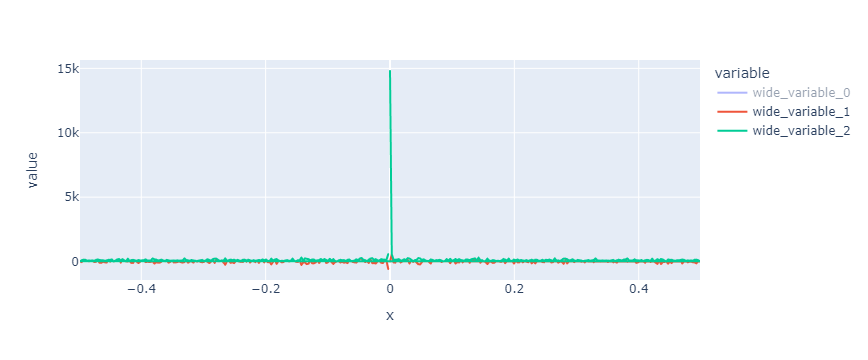

In [119]:
fig = px.line(x=df["Date Freq"],
              y=[df["Births FFT"].values.real,
                 df["Births FFT"].values.imag,
                 np.abs(df["Births FFT"])])
fig.show()

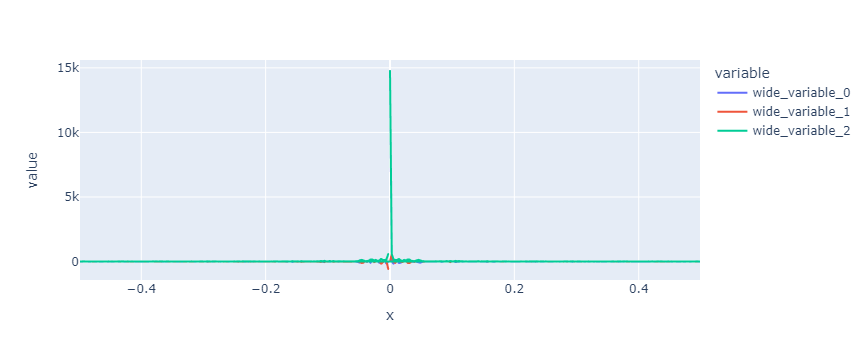

In [120]:
fig = px.line(x=df["Date Freq"],
              y=[df["Births W15 FFT"].values.real,
                 df["Births W15 FFT"].values.imag,
                 np.abs(df["Births W15 FFT"])])
fig.show()

### Inverse Fast Fourier Transformation

In [121]:
df["Births IFFT"] = ifft(df["Births FFT"].values).real
df.head(5)

,Date,Births,Births W3,Births W5,Births W10,Births W15,Day -1,Day -2,Day Diff -1,Day Diff Per -1,Births FFT,Births W15 FFT,Date Freq,Births IFFT
14,1959-01-15,45,49.000000,43.6,40.0,38.133333,47.0,55.0,-8.0,-0.170213,14796.000000- 0.000000j,14756.733333- 0.000000j,0.000000,45.0
15,1959-01-16,37,43.000000,43.4,40.8,38.266667,45.0,47.0,-2.0,-0.044444,-33.832868+ 577.064330j,-0.639284+ 578.034339j,0.002849,37.0
16,1959-01-17,50,44.000000,46.8,41.3,39.466667,37.0,45.0,-8.0,-0.216216,-113.885512- 66.495569j,-163.818712- 29.821077j,0.005698,50.0
17,1959-01-18,43,43.333333,44.4,41.3,40.333333,50.0,37.0,13.0,0.260000,125.590958- 77.497166j,48.424746- 106.292255j,0.008547,43.0
18,1959-01-19,41,44.666667,43.2,41.6,41.000000,43.0,50.0,-7.0,-0.162791,101.165157+ 117.294171j,101.917254+ 63.101989j,0.011396,41.0


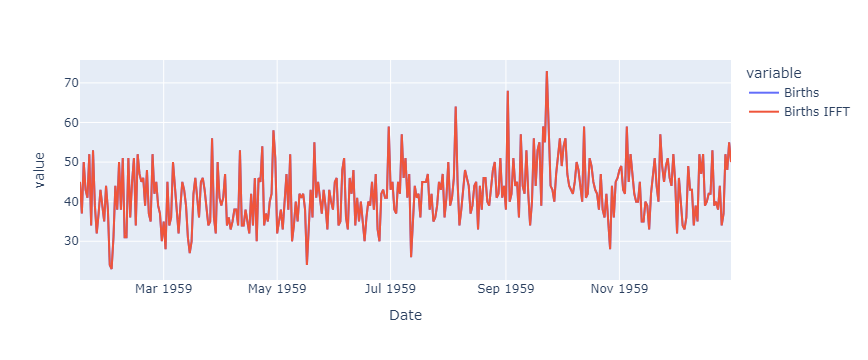

In [122]:
fig = px.line(df, x="Date",
              y = ["Births", "Births IFFT"])
fig.show()

<StemContainer object of 3 artists>

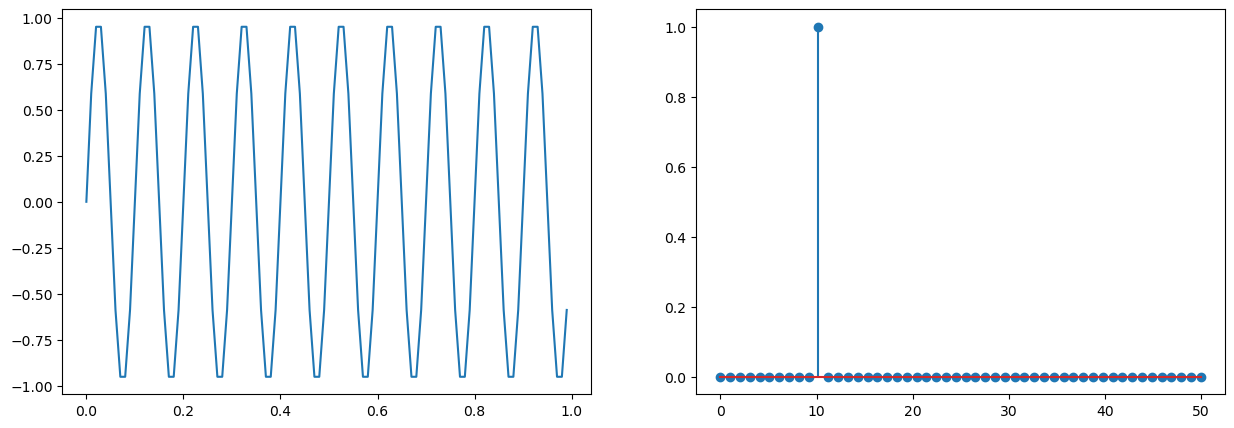

In [123]:
import matplotlib.pyplot as plt
# Frequency and sampling rate
f = 10 # frequency
Fs = 100 # sampling rate
t = np.arange(0,1,1/Fs)
# Sine function
y = np.sin(2 * np.pi * f * t)
# Perform Fourier transform using scipy
from scipy import fftpack
y_fft = fftpack.fft(y)
# Plot data
n = np.size(t)
fr = Fs/2 * np.linspace(0,1,n//2)
y_m = 2/n * abs(y_fft[0:np.size(fr)])
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
ax[0].plot(t, y)    # plot time series
ax[1].stem(fr, y_m) # plot freq domain